In [71]:
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('planning_database_NYC_tracts.csv')
df.head()

,GIDTR,State,State_name,County,County_name,Tract,BCT,NCode,Neighborhood,init_return,...,Single_Unit_ACSMOE_13_17,MLT_U2_9_STRC_ACS_13_17,MLT_U2_9_STRC_ACSMOE_13_17,MLT_U10p_ACS_13_17,MLT_U10p_ACSMOE_13_17,Mobile_Homes_ACS_13_17,Mobile_Homes_ACSMOE_13_17,Crowd_Occp_U_ACS_13_17,Crowd_Occp_U_ACSMOE_13_17,Occp_U_NO_PH_SRVC_ACS_13_17
0,36005000100,36,New York,5,Bronx County,100,2000100,X33,Rikers Island,0%,...,16.0,0.0,16.0,0.0,16.0,0.0,16.0,0.0,16.0,0.0
1,36005000200,36,New York,5,Bronx County,200,2000200,X11,Clason Point,59%,...,162.0,574.0,145.0,29.0,34.0,0.0,16.0,225.0,90.0,31.0
2,36005000400,36,New York,5,Bronx County,400,2000400,X11,Clason Point,62%,...,181.0,725.0,181.0,35.0,42.0,7.0,11.0,62.0,59.0,35.0
3,36005001600,36,New York,5,Bronx County,1600,2001600,X11,Clason Point,68%,...,115.0,345.0,117.0,1342.0,167.0,0.0,16.0,252.0,102.0,87.0
4,36005001900,36,New York,5,Bronx County,1900,2001900,X32,Port Morris,56%,...,33.0,251.0,78.0,693.0,101.0,0.0,11.0,75.0,35.0,41.0


In [46]:
selected_columns = ['init_return',
                    'County_name',
                    'Neighborhood',
                    'URBANIZED_AREA_POP_CEN_2010',
                    'URBAN_CLUSTER_POP_CEN_2010',
                    'RURAL_POP_CEN_2010',
                    'Tot_Population_CEN_2010',
                    'Males_CEN_2010',
                    'Females_CEN_2010',
                    'Median_Age_ACS_13_17',
                    'Hispanic_CEN_2010',
                    'NH_White_alone_CEN_2010',
                    'NH_Blk_alone_CEN_2010',
                    'NH_AIAN_alone_CEN_2010',
                    'Not_HS_Grad_ACS_13_17',
                    'Born_US_ACS_13_17'
                   ]

tdf = df[selected_columns]
tdf.init_return = tdf.init_return.map(lambda x: float(x[:-1]))
tdf = tdf[0 < tdf.init_return]

In [47]:
tdf.head()

,init_return,County_name,Neighborhood,URBANIZED_AREA_POP_CEN_2010,URBAN_CLUSTER_POP_CEN_2010,RURAL_POP_CEN_2010,Tot_Population_CEN_2010,Males_CEN_2010,Females_CEN_2010,Median_Age_ACS_13_17,Hispanic_CEN_2010,NH_White_alone_CEN_2010,NH_Blk_alone_CEN_2010,NH_AIAN_alone_CEN_2010,Not_HS_Grad_ACS_13_17,Born_US_ACS_13_17
1,59.0,Bronx County,Clason Point,4334.0,0.0,0.0,4334.0,2030.0,2304.0,39.6,2993.0,130.0,977.0,12.0,849.0,3259.0
2,62.0,Bronx County,Clason Point,5503.0,0.0,0.0,5503.0,2680.0,2823.0,40.0,3755.0,189.0,1327.0,11.0,527.0,4728.0
3,68.0,Bronx County,Clason Point,5643.0,0.0,0.0,5643.0,2488.0,3155.0,32.6,3482.0,195.0,1829.0,16.0,1117.0,3955.0
4,56.0,Bronx County,Port Morris,1917.0,0.0,0.0,1917.0,1065.0,852.0,31.1,1186.0,187.0,487.0,10.0,435.0,2169.0
5,66.0,Bronx County,Clason Point,8731.0,0.0,0.0,8731.0,3817.0,4914.0,29.6,5361.0,112.0,3023.0,44.0,2307.0,7579.0


In [48]:
tdf.corr()

,init_return,URBANIZED_AREA_POP_CEN_2010,URBAN_CLUSTER_POP_CEN_2010,RURAL_POP_CEN_2010,Tot_Population_CEN_2010,Males_CEN_2010,Females_CEN_2010,Median_Age_ACS_13_17,Hispanic_CEN_2010,NH_White_alone_CEN_2010,NH_Blk_alone_CEN_2010,NH_AIAN_alone_CEN_2010,Not_HS_Grad_ACS_13_17,Born_US_ACS_13_17
init_return,1.000000,0.264458,NaN,0.047343,0.264480,0.252964,0.270271,0.325488,0.251106,0.316061,-0.286994,-0.149138,0.098932,0.293631
URBANIZED_AREA_POP_CEN_2010,0.264458,1.000000,NaN,-0.039266,1.000000,0.990279,0.992829,-0.087397,0.568286,0.468542,0.294935,0.317875,0.609492,0.875400
URBAN_CLUSTER_POP_CEN_2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RURAL_POP_CEN_2010,0.047343,-0.039266,NaN,1.000000,-0.038889,-0.039623,-0.037654,0.020903,-0.018309,-0.017448,-0.015598,-0.018012,-0.023363,-0.033203
Tot_Population_CEN_2010,0.264480,1.000000,NaN,-0.038889,1.000000,0.990279,0.992829,-0.087391,0.568287,0.468543,0.294933,0.317873,0.609492,0.875401
Males_CEN_2010,0.252964,0.990279,NaN,-0.039623,0.990279,1.000000,0.966550,-0.108581,0.591445,0.472594,0.226159,0.303948,0.627577,0.845013
Females_CEN_2010,0.270271,0.992829,NaN,-0.037654,0.992829,0.966550,1.000000,-0.067817,0.539562,0.457787,0.349460,0.324905,0.584486,0.887926
Median_Age_ACS_13_17,0.325488,-0.087397,NaN,0.020903,-0.087391,-0.108581,-0.067817,1.000000,-0.298292,0.184665,-0.158703,-0.154808,-0.212678,-0.138836
Hispanic_CEN_2010,0.251106,0.568286,NaN,-0.018309,0.568287,0.591445,0.539562,-0.298292,1.000000,-0.186357,0.138461,0.283621,0.792169,0.402910
NH_White_alone_CEN_2010,0.316061,0.468542,NaN,-0.017448,0.468543,0.472594,0.457787,0.184665,-0.186357,1.000000,-0.365995,-0.204820,-0.197539,0.560319


In [64]:
np.sum(pd.isnull(tdf), axis=0)

init_return                     0
County_name                     0
Neighborhood                    0
URBANIZED_AREA_POP_CEN_2010     0
URBAN_CLUSTER_POP_CEN_2010      0
RURAL_POP_CEN_2010              0
Tot_Population_CEN_2010         0
Males_CEN_2010                  0
Females_CEN_2010                0
Median_Age_ACS_13_17           10
Hispanic_CEN_2010               0
NH_White_alone_CEN_2010         0
NH_Blk_alone_CEN_2010           0
NH_AIAN_alone_CEN_2010          0
Not_HS_Grad_ACS_13_17           1
Born_US_ACS_13_17               1
dtype: int64

In [72]:
tdf = tdf.dropna(axis=0)
X, y = tdf.values[:, 1:], tdf.values[:, 0]

#X, X_test, y, y_test = train_test_split(X, y)

pipe = make_pipeline(ColumnTransformer(
                        OneHotEncoder(sparse=False),
                        StandardScaler()),
                     PCA(),
                     LinearRegression(n_jobs=-1))

pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='error', n_values=None,
                               sparse=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

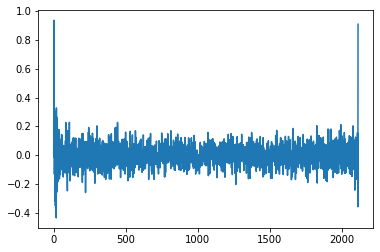

In [78]:
plt.plot(pipe.steps[-1][1].coef_)

In [82]:
pipe.steps[-1][1].coef_.shape

(2112,)

In [83]:
X.shape

(2112, 15)